---------
# 배추가격 예측 AI Project for 모인활

Notes by kjune18@naver.com, Handong Global Univ.

## 5. 저장된 학습 모델 불러오기 

학습모델을 저장하는 이유는 학습 모델을 저장하지 않고 사용자로부터 배추 가격 예측 요청이 발생할 때마다 매번 학습을 해서 결과를 돌려준다면 시간과 비용이 많이 들 것이기 때문이다.

따라서 서버에서 내부적으로 데이터를 이용해 학습된 모델을 사용해서 배추가격을 예측하는 것이 효율적이다.

In [1]:
import tensorflow.compat.v1 as tf
import numpy as np
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# 기본적인 placeholder 와 가중치와 bias 값 가져오기
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([4, 1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

In [3]:
# 가설 가져오기
hypothesis = tf.matmul(X, W) + b

In [4]:
#저장된 모델 불러오는 모델 초기화
saver = tf.train.Saver()
model = tf.global_variables_initializer()

In [5]:
# 사용자로부터 4가지 입력 받을 수 있도록 작성
avg_temp = float(input('평균 온도: '))
min_temp = float(input('최저 온도: '))
max_temp = float(input('최고 온도: '))
rain_fall = float(input('강수량mm: '))

평균 온도: 10
최저 온도: 5
최고 온도: 25
강수량mm: 30


## 6. 학습 모델을 이용하여 값 출력하기

In [6]:
# tensorflow Session이용하여 결과 가격값 출력
with tf.Session() as sess:
    sess.run(model)     # model 불러오기
    
    save_path = "./saved.cpkt"  # cpkt파일 불러오기
    saver.restore(sess, save_path)
    
    data = ((avg_temp, min_temp, max_temp, rain_fall), )  # 기존의 학습된 데이터와 같은 2차원 배열 만들기
    arr = np.array(data, dtype=np.float32)
    
    # 예측 수행
    x_data = arr[0:4]  # avg_temp, min_temp, max_temp, rain_fall
    price = sess.run(hypothesis, feed_dict={X: x_data})
   
    print("예측한 배추가격은 ", price[0], "원 입니다.")

INFO:tensorflow:Restoring parameters from ./saved.cpkt
예측한 배추가격은  [6582.5063] 원 입니다.


## 7. 데이터 시각화

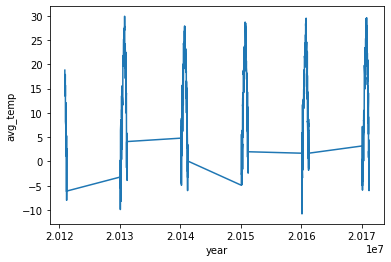

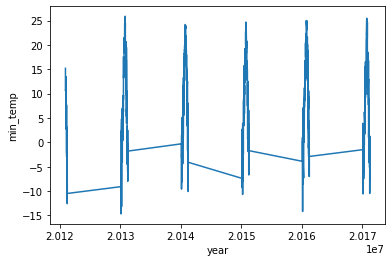

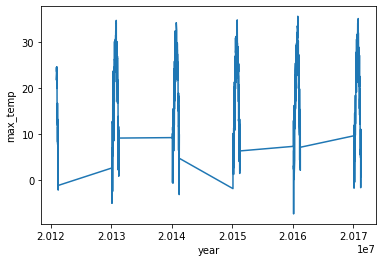

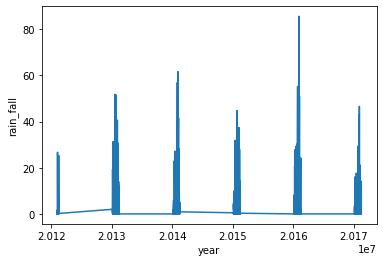

In [8]:
import matplotlib.pyplot as plt
from pandas.io.parsers import read_csv

visualdata = read_csv('pricedata.csv')  # csv파일 읽어오기

xy = np.array(visualdata)    # 행렬 형태로 저장하기

# 4개의 변인
datas = xy[:, 1:-1]   # slicing x

plt.plot(xy[1000:,[0]], datas[1000:,[0]])
plt.xlabel('year')
plt.ylabel('avg_temp')
plt.show()

plt.plot(xy[1000:,[0]], datas[1000:,[1]])
plt.xlabel('year')
plt.ylabel('min_temp')
plt.show()

plt.plot(xy[1000:,[0]], datas[1000:,[2]])
plt.xlabel('year')
plt.ylabel('max_temp')
plt.show()

plt.plot(xy[1000:,[0]], datas[1000:,[3]])
plt.xlabel('year')
plt.ylabel('rain_fall')
plt.show()

## 8. 다양한 경우로 확인하기

In [9]:
avg_tempx = np.arange(-30, 31, 1)
min_tempx = np.arange(-50, 11, 1)
max_tempx = np.arange(-10, 51, 1)
rain_fallx = np.arange(0, 61, 1)
# shuffle로 배열 섞기
np.random.shuffle(avg_tempx)
np.random.shuffle(min_tempx)
np.random.shuffle(max_tempx)
np.random.shuffle(rain_fallx)

In [10]:
for i in avg_tempx:
    if (min_tempx[i] <= max_tempx[i]
        and min_tempx[i] <= avg_tempx[i] <= max_tempx[i]):
        x_data_rand = np.stack((avg_tempx, min_tempx, max_tempx, rain_fallx), axis=1)

print(x_data_rand)

[[-24   0   5  50]
 [-15 -19  43  19]
 [-10 -38  16  27]
 [ -4 -10   6   9]
 [ 20 -17  28  39]
 [-21 -30  -3  23]
 [ 28  -9  14  51]
 [ 21 -24   4   2]
 [ 29 -48  29  29]
 [ -2 -43  41  14]
 [-14   9  -8   5]
 [ -8  -1  17  46]
 [  5 -23  37  37]
 [ -7   8  18   0]
 [ 15 -50  13  11]
 [ 25 -44  48  59]
 [ 12  -8  12  54]
 [  4 -36  30  60]
 [-29 -20  -1   4]
 [ 30   6   2  49]
 [ 27 -14  26  55]
 [  7  -4  38  42]
 [-20  -7  -6  57]
 [ -5   2  24  33]
 [ 19   7  33  45]
 [-16 -35  -5  12]
 [  3 -49  50  41]
 [ 22 -13  39  18]
 [-25 -21  27  48]
 [-18 -11  34  31]
 [  1 -27  49  21]
 [-12   4  45  43]
 [-28 -45  31  52]
 [ 24   1   0  47]
 [ 14 -25  44  16]
 [ 13  -3  -7  20]
 [  0 -33 -10  56]
 [ 26 -16  22  28]
 [ 11 -22  35  26]
 [-17 -26  -4  15]
 [ -3 -12   7   3]
 [-22  -2  47  58]
 [-26 -18  21   6]
 [  8 -42   1  24]
 [ -9 -37  40   8]
 [ 18  10  -9  53]
 [-30 -39  -2   1]
 [-13  -5  32  32]
 [-11   5  19  34]
 [  6 -15  46  13]
 [ -1 -47  25  30]
 [ 10 -46  15  17]
 [-23 -41  3

In [11]:
# tensorflow Session이용하여 결과 가격값 출력
with tf.Session() as sess:
    sess.run(model)     # model 불러오기
    
    save_path_rand = "./saved.cpkt"  # cpkt파일 불러오기
    saver.restore(sess, save_path_rand)
    
    pricex = sess.run(hypothesis, feed_dict={X: x_data_rand})

INFO:tensorflow:Restoring parameters from ./saved.cpkt


In [12]:
#  print(price.astype(np.int))
for i in range(len(x_data_rand)):
    print("평균온도:", x_data_rand[i][0])
    print("최저온도:", x_data_rand[i][1])
    print("최고온도:", x_data_rand[i][2])
    print("강수량:", x_data_rand[i][3])
    print("예측한 배추가격은 ", pricex[i], "원 입니다.")
    print("---------------------")

평균온도: -24
최저온도: 0
최고온도: 5
강수량: 50
예측한 배추가격은  [4306.612] 원 입니다.
---------------------
평균온도: -15
최저온도: -19
최고온도: 43
강수량: 19
예측한 배추가격은  [16039.962] 원 입니다.
---------------------
평균온도: -10
최저온도: -38
최고온도: 16
강수량: 27
예측한 배추가격은  [12605.784] 원 입니다.
---------------------
평균온도: -4
최저온도: -10
최고온도: 6
강수량: 9
예측한 배추가격은  [4045.4304] 원 입니다.
---------------------
평균온도: 20
최저온도: -17
최고온도: 28
강수량: 39
예측한 배추가격은  [11320.736] 원 입니다.
---------------------
평균온도: -21
최저온도: -30
최고온도: -3
강수량: 23
예측한 배추가격은  [6479.1206] 원 입니다.
---------------------
평균온도: 28
최저온도: -9
최고온도: 14
강수량: 51
예측한 배추가격은  [6434.1646] 원 입니다.
---------------------
평균온도: 21
최저온도: -24
최고온도: 4
강수량: 2
예측한 배추가격은  [4880.687] 원 입니다.
---------------------
평균온도: 29
최저온도: -48
최고온도: 29
강수량: 29
예측한 배추가격은  [16455.604] 원 입니다.
---------------------
평균온도: -2
최저온도: -43
최고온도: 41
강수량: 14
예측한 배추가격은  [19187.584] 원 입니다.
---------------------
평균온도: -14
최저온도: 9
최고온도: -8
강수량: 5
예측한 배추가격은  [-2805.559] 원 입니다.
---------------------
평균온도: -8
최저온도: -1
최고온도: 17
강수량: 46
예측한 배

## 참고자료

1. 안경잡이개발자
https://ndb796.tistory.com